<a href="https://colab.research.google.com/github/ben854719/Arctic-Sentinel-AI-Native-ISR-Dashboard/blob/main/ML_Risk_Forescast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get update
!apt-get install libboost-all-dev

Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,130 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,451 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Pa

In [2]:
%%writefile telemetry_analysis.cpp
#include <iostream>
#include <string>
#include <vector>
#include <map>

// Simulated telemetry input
struct TelemetryPacket {
    std::string source;
    std::string message;
    float temperature;
    float humidity;
    float radiation;
};

// Basic sentiment parser (stub)
std::string parseSentiment(const std::string& message) {
    if (message.find("conflict") != std::string::npos || message.find("alert") != std::string::npos)
        return "Negative";
    if (message.find("cooperation") != std::string::npos || message.find("stable") != std::string::npos)
        return "Positive";
    return "Neutral";
}

// Environmental stressor detection
std::vector<std::string> detectStressors(const TelemetryPacket& packet) {
    std::vector<std::string> stressors;
    if (packet.temperature > 40.0) stressors.push_back("Heatwave");
    if (packet.humidity < 20.0) stressors.push_back("Drought Risk");
    if (packet.radiation > 5.0) stressors.push_back("Radiation Spike");
    return stressors;
}

// Strategic signal extraction
void extractSignals(const TelemetryPacket& packet) {
    std::string sentiment = parseSentiment(packet.message);
    std::vector<std::string> stressors = detectStressors(packet);

    std::cout << "Source: " << packet.source << "\n";
    std::cout << "Sentiment: " << sentiment << "\n";
    std::cout << "Environmental Stressors:\n";
    for (const auto& s : stressors) {
        std::cout << " - " << s << "\n";
    }
    std::cout << "--------------------------\n";
}

int main() {
    std::vector<TelemetryPacket> stream = {
        {"ArcticNode01", "Radiation alert near ice shelf", 42.5, 18.0, 6.2},
        {"GeoHub07", "Stable cooperation in region", 22.0, 55.0, 1.2}
    };

    for (const auto& packet : stream) {
        extractSignals(packet);
    }

    return 0;
}

Writing telemetry_analysis.cpp


In [3]:
!g++ telemetry_analysis.cpp -o telemetry_analysis
!./telemetry_analysis

Source: ArcticNode01
Sentiment: Negative
Environmental Stressors:
 - Heatwave
 - Drought Risk
 - Radiation Spike
--------------------------
Source: GeoHub07
Sentiment: Positive
Environmental Stressors:
--------------------------


In [4]:
!pip install opencv-python
!pip install ffmpeg-python

In [5]:
import urllib.request

video_url = 'https://svs.gsfc.nasa.gov/vis/a000000/a005500/a005583/sea_ice_2025_min_2160p60_p60.mp4'
urllib.request.urlretrieve(video_url, 'downloaded_video.mp4')

('downloaded_video.mp4', <http.client.HTTPMessage at 0x7ed30f6b6e70>)

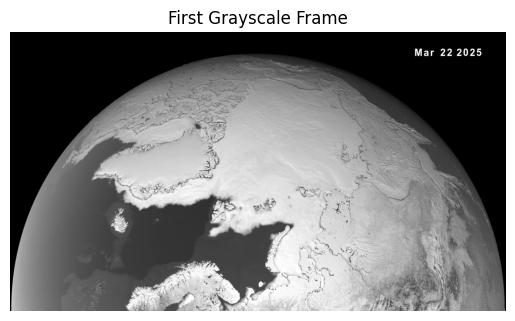

In [6]:
import cv2
import matplotlib.pyplot as plt

cap = cv2.VideoCapture('downloaded_video.mp4')

if cap.isOpened():
    ret, frame = cap.read()
    if ret:
        # Convert to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Display the first grayscale frame
        plt.imshow(gray, cmap='gray')
        plt.title('First Grayscale Frame')
        plt.axis('off') # Hide axes for cleaner image display
        plt.show()

cap.release()

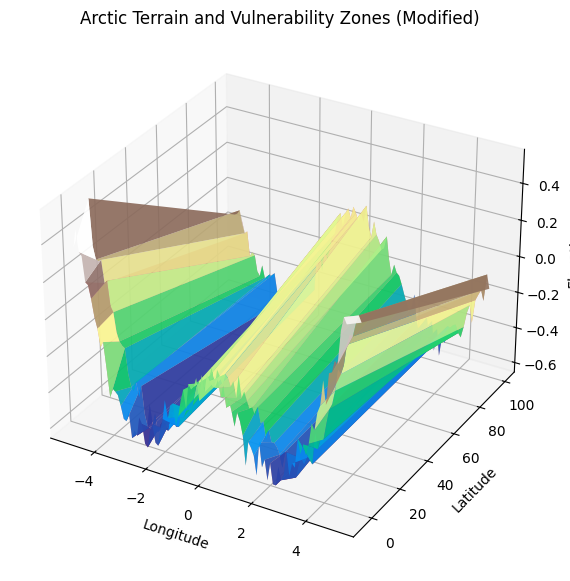

Generated 3D Arctic terrain visualization with vulnerability overlay and saved as arctic_terrain_vulnerability_modified.png


In [7]:
# Data Visualization.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#  Customizable Parameters
# Terrain generation parameters
x_range = (-5, 5)
y_range = (-5, 5)
resolution = 100
terrain_function_multiplier = 0.5
terrain_noise_strength = 0.05

# Vulnerability parameters
vulnerability_threshold = 0.2
vulnerability_color = 'red'
vulnerability_alpha = 0.4

# Plotting parameters
terrain_cmap = 'terrain' # Colormap for the terrain (e.g., 'viridis', 'cividis', 'terrain')
figure_size = (10, 7)
output_dpi = 300
output_filename = "arctic_terrain_vulnerability_modified.png"
# --------------------------------

# Generate synthetic elevation data
x = np.linspace(x_range[0], x_range[1], resolution)
y = np.meshgrid(y_range[0], y_range[1], resolution)
x, y = np.meshgrid(x, y)

# Main terrain function + noise
z = np.sin(np.sqrt(x**2 + y**2)) * terrain_function_multiplier + \
    np.cos(x) * 0.3 + np.random.normal(0, terrain_noise_strength, x.shape)

# Define vulnerability mask
vulnerability_mask = z < vulnerability_threshold

# Create figure and 3D axis
fig = plt.figure(figsize=figure_size)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap=terrain_cmap, edgecolor='none', alpha=0.9)

# Overlay vulnerability zones
z_masked = np.where(vulnerability_mask, z, np.nan)
ax.plot_surface(x, y, z_masked, color=vulnerability_color, alpha=vulnerability_alpha, edgecolor='none')

# Labeling
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Elevation')
ax.set_title('Arctic Terrain and Vulnerability Zones (Modified)')

# Save the figure
output_path = f"/content/{output_filename}"
plt.savefig(output_path, dpi=output_dpi)

# Display the plot in the notebook
plt.show()

print(f"Generated 3D Arctic terrain visualization with vulnerability overlay and saved as {output_filename}")

In [ ]:
Explanation:

This 3D visualization displays a synthetic Arctic terrain, highlighting areas identified as vulnerable (shown in red) based on their elevation falling below a specified threshold.
